In [1]:
import pandas as pd
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [52]:
# Read the data

# First Approach to Change MEDV to PRICES
# data = pd.read_csv('./dataset/boston.csv', header=None, skiprows=1)
# feature_names = ['CRIM' ,'ZN' ,'INDUS' ,'CHAS','NOX','RM' ,'AGE','DIS' ,'RAD','TAX'  ,'PTRATIO','B'  ,'LSTAT','MEDV']
# data = data.rename(columns={'MEDV': 'PRICES'})

# Second Approach to strips the first columns
data = pd.read_csv('./dataset/boston.csv')
data.columns = [col.strip() for col in data.columns]
data = data.rename(columns={'MEDV': 'PRICE'})



X = data.drop('PRICE', axis=1)
y = data['PRICE']

print(data)


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=30)

print('X Train Length : ', len(X_train))
print('X Test Length : ', len(X_test))
print('X Val Length : ', len(X_val))


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [53]:
# Feature Scaling

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_val_scaler = scaler.fit_transform(X_val)
X_test_scaler = scaler.fit_transform(X_test)

[[-0.41425879 -0.50512499 -1.29214218 ...  0.18727079  0.39651419
  -1.01531611]
 [-0.40200818 -0.50512499 -0.16208345 ... -0.21208981  0.3870674
  -0.05366252]
 [-0.39721053 -0.50512499 -0.60948856 ... -0.16771641  0.42854113
  -0.31132373]
 ...
 [-0.41604586  3.03838247 -1.3166773  ... -0.56707702  0.35987906
  -0.90549329]
 [ 0.92611293 -0.50512499  1.00549958 ...  0.8528718  -2.87841346
   1.52750437]
 [-0.39030549 -0.50512499 -0.37135358 ...  1.16348561 -3.32828832
  -0.25218837]]


In [61]:
# Make Regression Model

model = Sequential()
len_input = X.shape[1]
model.add(Dense(128, activation='relu', input_dim=len_input))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', metrics=['mae'], optimizer='adam') 
# MAE -> Mean Absolute Error

# mean squared error (MSE), also called mean squared deviation (MSD), the average squared difference between the value observed in a statistical study and the values predicted from a model.

history = model.fit(X_train_scaler, y_train, validation_data=(X_val_scaler, y_val), epochs=100, batch_size=16)

Epoch 1/100
23/23 [==============================] - 1s 7ms/step - loss: 552.9863 - mae: 21.5734 - val_loss: 474.1897 - val_mae: 19.2543
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 368.6458 - mae: 16.9810 - val_loss: 238.7616 - val_mae: 12.6838
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 152.5428 - mae: 9.7388 - val_loss: 74.8126 - val_mae: 5.6361
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 60.4066 - mae: 5.9349 - val_loss: 56.1303 - val_mae: 5.1249
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 37.1590 - mae: 4.5725 - val_loss: 43.7233 - val_mae: 4.1613
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 28.3768 - mae: 3.9551 - val_loss: 40.4056 - val_mae: 3.9442
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 25.1338 - mae: 3.7002 - val_loss: 38.1095 - val_mae: 3.5886
Epoch 8/100
23/23 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 2ms/step - loss: 9850266.0000 - mae: 3081.7876
Accuracy on Testing Set: 3081.78759765625


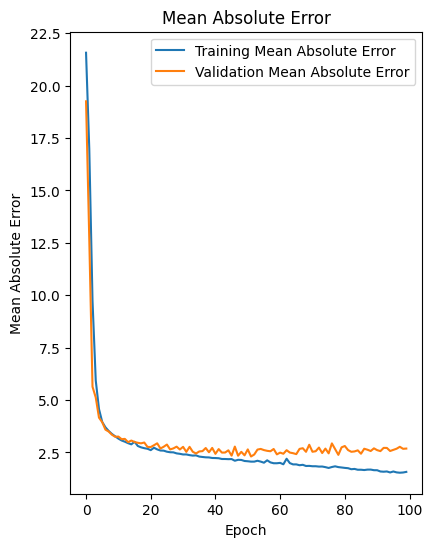

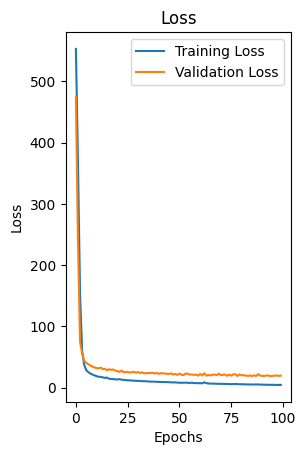

In [62]:
# Evaluate Model
loss, mae = model.evaluate(X_test, y_test)
print(f'Accuracy on Testing Set: {mae}')

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training Mean Absolute Error')
plt.plot(history.history['val_mae'], label="Validation Mean Absolute Error")
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label ='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Semakin turun angkanya semakin bagus

In [73]:
# Make Predictions

predictions = model.predict(X_test_scaler)
print(f"Predictions : {predictions[:1]}")
print(f'Actual : {y_test[:1]}')

# plt.title('Prediction')
# print(len(X_test))
# print(len(y_test))

4/4 [==============================] - 0s 1ms/step
Predictions : [[23.103588]]
Actual : 75    21.4
Name: PRICE, dtype: float64
